<div style="text-align: center;">
  <span style="color:#809bd8; font-size: 24px; font-weight: bold;">Institución Universitaria Digital de Antioquia</span>
  <br>
  <img src="https://imgur.com/KUMa2uy.png" alt="DataFrame frutas" style="max-width: 20%; height: auto;">
</div>

---
**<span style="color:#809bd8">Evidencia de Aprendizaje:</span>** S25 - EA1. Taller aplicado a caso de estudio para el reconocimiento de las redes neuronales

**<span style="color:#809bd8">Asignatura:</span>** Principios de Deep Learning y Redes Neuronales

**<span style="color:#809bd8">Estudiante:</span>** Jean Carlos Páez Ramírez

**<span style="color:#809bd8">Grupo:</span>** PREICA2501B020140

**<span style="color:#809bd8">Docente:</span>** Sharon Karin Camacho Guzman **(Ingeniera Administradora Especialista en ingeniería Financiera de la Universidad Nacional de Colombia)**

**<span style="color:#809bd8">Fecha:</span>** 14 de mayo de 2025

# 🧠 Taller aplicado a caso de estudio para el reconocimiento de las redes neuronales

## 🔹 Sección 1: Entradas del modelo para detectar fraudes financieros

Para que una red neuronal detecte fraudes en transacciones con tarjetas de crédito, es necesario identificar las **variables relevantes (features)** que alimentarán el modelo.

### 🧾 Entradas posibles (features):
1. Monto de la transacción (`transaction_amount`)
2. Ubicación del comercio vs. ubicación habitual del cliente (`merchant_location_distance`)
3. Hora de la transacción (`transaction_hour`)
4. Tipo de comercio (`merchant_type`)
5. Historial del cliente (`customer_transaction_count`)
6. Frecuencia de transacciones recientes (`transactions_last_24h`)
7. Tipo de tarjeta (`card_type`)
8. Dispositivo usado (`device_id`)
9. Dirección IP (`ip_location_match`)
10. País de origen (`country_match`)

Estas variables permiten detectar transacciones atípicas o inconsistentes, ideales para el modelo de fraude.


## 🔹 Sección 2: Forward Pass y Backward Pass

### 🔄 Forward Pass:
1. Las entradas se multiplican por pesos, se suma un sesgo (bias).
2. El resultado pasa por una función de activación.
3. Esto se repite por cada capa hasta obtener la salida.

```python
# Ejemplo simbólico
output = model.predict(X)
```

**Con mis propias palabras:** En el caso de estudio, el forward pass es el proceso en el que los datos de una transacción (por ejemplo: monto, ubicación, hora, tipo de comercio, historial del cliente, etc.) se introducen en la red neuronal. Cada entrada se multiplica por un peso y se le suma un sesgo (bias). El resultado pasa por una función de activación (como ReLU en las capas ocultas y sigmoid en la salida). Este proceso se repite capa por capa, transformando los datos hasta que la red produce una salida: una probabilidad de que la transacción sea fraudulenta o no.

**Ejemplo concreto:**
Supón que una transacción tiene los siguientes valores: monto alto, ubicación inusual, hora atípica, etc. Estos valores pasan por la red, se combinan y transforman, y al final la red da una probabilidad, por ejemplo, 0.92 (lo que indica alta probabilidad de fraude).

### 🔁 Backward Pass:
1. Se calcula el error: `error = predicción - valor_real`
2. Se ajustan pesos mediante retropropagación (backpropagation).

```python
# En Keras
model.fit(X_train, y_train, epochs=10)
```
**Con mis propias palabras:** Después de obtener la predicción, la red compara el resultado con la etiqueta real (si la transacción era realmente fraude o no). Calcula el error (diferencia entre la predicción y la realidad).
El backward pass es el proceso en el que este error se “retropropaga” por la red, ajustando los pesos y sesgos de cada conexión para que la próxima vez la red cometa menos error. Este ajuste se realiza usando el algoritmo de retropropagación y optimizadores como Adam o SGD.

### 🖼️ Visualización


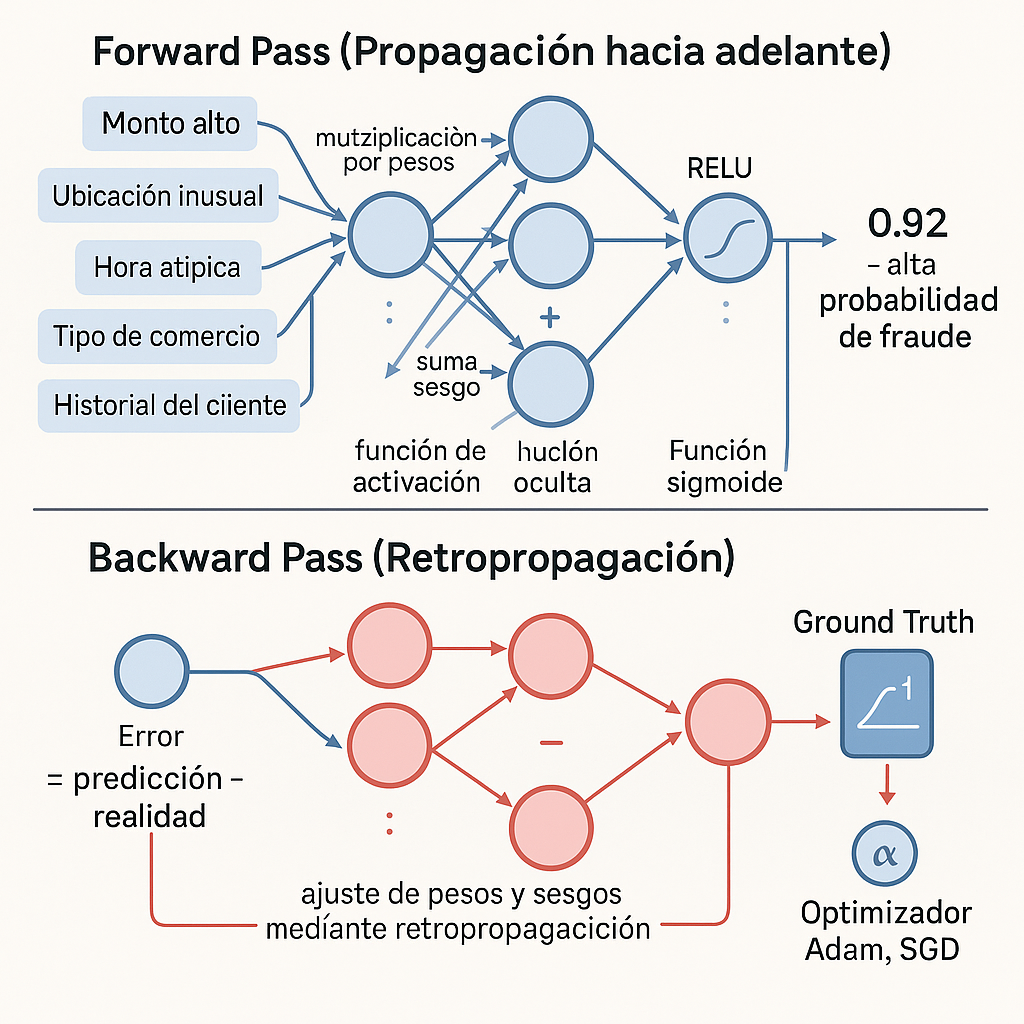

## 🔹 Sección 3: Función de Activación

### ✅ Función seleccionada: `sigmoid`

- Ideal para clasificación binaria.
- Produce un valor entre 0 y 1 (probabilidad).
- Fórmula:

    ![sigmoid](https://drive.google.com/uc?export=view&id=1UnU2qy3wmr9qykY2uFcRnYiAqRxDGlgs)



Se usará `sigmoid` en la capa de salida y `relu` en capas ocultas.

## 🔹 Sección 4: Beneficios y Limitaciones

### ✅ Beneficios
- Alta precisión
- Detección en tiempo real
- Adaptabilidad a nuevos fraudes
- Escalable a grandes volúmenes

### ⚠️ Limitaciones
- Datos desbalanceados (fraudes son pocos)
- Difícil de interpretar (caja negra)
- Riesgo de falsos positivos
- Requiere entrenamiento constante

### ¿Es una buena aplicación?
**Sí**, especialmente si se actualiza regularmente y se gestiona con cuidado.

### ¿Es beneficioso para cualquiera que adopte este método?

**No necesariamente**. Aunque el método es potente y puede ser muy útil para instituciones financieras o empresas con grandes volúmenes de transacciones, no es universalmente beneficioso para todos. Su efectividad depende de varios factores:

- **Disponibilidad y calidad de los datos:** Si no se cuenta con datos relevantes y bien etiquetados, el modelo puede no funcionar bien.
- **Recursos técnicos:** Implementar y mantener redes neuronales requiere conocimientos técnicos y recursos computacionales.
- **Necesidad de interpretación:** Si la organización necesita entender claramente por qué se toma cada decisión (por ejemplo, por temas regulatorios), la “caja negra” de las redes neuronales puede ser un problema.
- **Volumen de transacciones:** Para empresas pequeñas o con pocos datos, métodos más simples pueden ser suficientes y más fáciles de mantener.
- **Gestión de falsos positivos:** Un alto número de falsos positivos puede generar molestias a los clientes y costos adicionales.

## 🔹 Sección 5: Implementación del Modelo Neuronal


Implemento un modelo de red neuronal para la detección de fraudes financieros. El código comienza generando un conjunto de datos sintético con características relevantes para el fraude, como monto, ubicación, hora, tipo de comercio, entre otros. Luego, los datos se dividen en entrenamiento y prueba, y se normalizan para mejorar el desempeño del modelo. La arquitectura de la red neuronal consta de una capa de entrada, dos capas ocultas con activación ReLU y una capa de salida con activación sigmoide, ideal para clasificación binaria (fraude/no fraude). El modelo se entrena durante 20 épocas usando el optimizador Adam y la función de pérdida binary_crossentropy, monitoreando tanto la precisión como la pérdida en los conjuntos de entrenamiento y validación.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000,
                           n_features=10,
                           n_informative=6,
                           n_redundant=2,
                           n_classes=2,
                           weights=[0.95, 0.05],
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Input(shape=(10,)))  # Define explícitamente la forma de entrada
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8907 - loss: 0.3557 - val_accuracy: 0.9538 - val_loss: 0.1558
Epoch 2/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9476 - loss: 0.1561 - val_accuracy: 0.9650 - val_loss: 0.1191
Epoch 3/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9593 - loss: 0.1240 - val_accuracy: 0.9756 - val_loss: 0.0984
Epoch 4/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9678 - loss: 0.1050 - val_accuracy: 0.9787 - val_loss: 0.0859
Epoch 5/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9764 - loss: 0.0904 - val_accuracy: 0.9856 - val_loss: 0.0783
Epoch 6/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9799 - loss: 0.0793 - val_accuracy: 0.9869 - val_loss: 0.0746
Epoch 7/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9821 - loss: 0.0652 - val_accuracy: 0.9862 - val_loss: 0.0709
Epoch 8/20
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9811 - loss: 0.0750 - val_accuracy: 0.

Durante el entrenamiento, se observa que la precisión (accuracy) en el conjunto de entrenamiento aumenta rápidamente desde **0.89** en la primera época hasta valores superiores a **0.98** en las últimas épocas. La precisión en validación (val_accuracy) también es muy alta, alcanzando aproximadamente **0.99**, lo que indica que el modelo generaliza bien y no está sobreajustando. La pérdida (loss y val_loss) disminuye de manera constante, lo que sugiere que el modelo está aprendiendo correctamente a distinguir entre transacciones legítimas y fraudulentas. Estos resultados reflejan que la red neuronal es capaz de identificar patrones complejos en los datos y predecir con alta probabilidad cuándo una transacción es fraudulenta.

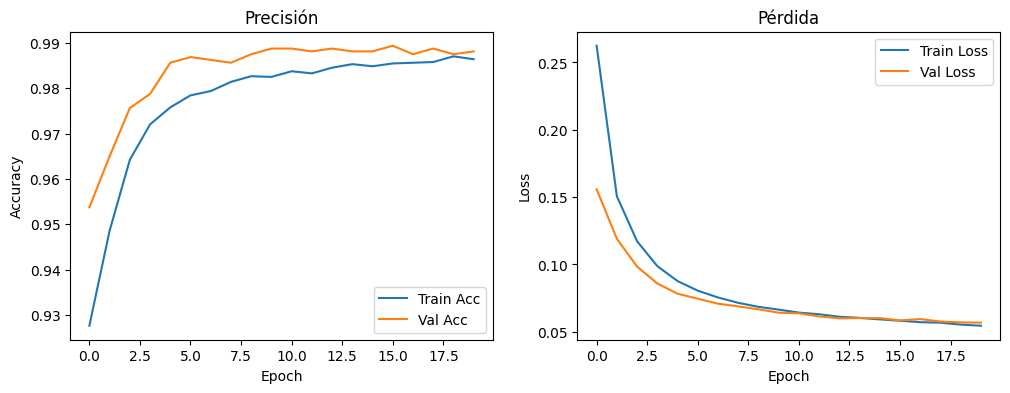

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Precisión')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Pérdida')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


**Precisión (Accuracy):**

La gráfica de precisión muestra que tanto la precisión de entrenamiento como la de validación aumentan rápidamente y se estabilizan cerca de **0.99**. Esto significa que el modelo es capaz de aprender a distinguir entre transacciones legítimas y fraudulentas con muy alta exactitud, tanto en los datos que ha visto (entrenamiento) como en los que no ha visto (validación).

**Pérdida (Loss):**

La gráfica de pérdida muestra una disminución constante tanto en entrenamiento como en validación, llegando a valores muy bajos (alrededor de **0.06**). Esto indica que el modelo está minimizando el error de predicción de manera efectiva y no muestra señales de sobreajuste (overfitting), ya que las curvas de entrenamiento y validación son muy similares y no se separan.

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1900
           1       0.96      0.67      0.79       100

    accuracy                           0.98      2000
   macro avg       0.97      0.83      0.89      2000
weighted avg       0.98      0.98      0.98      2000



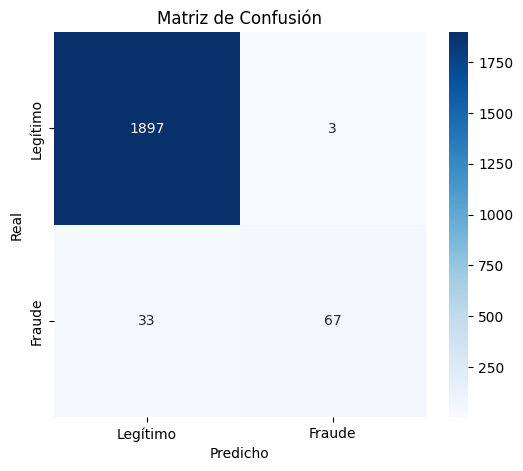

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legítimo", "Fraude"], yticklabels=["Legítimo", "Fraude"])
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.show()


**Matriz de Confusión y Reporte de Clasificación**

**Matriz de Confusión:**
- Legítimo predicho como legítimo: 1897
- Legítimo predicho como fraude: 3
- Fraude predicho como legítimo: 33
- Fraude predicho como fraude: 67

El modelo identifica correctamente la mayoría de las transacciones legítimas y una buena parte de los fraudes, aunque aún hay algunos fraudes que pasan desapercibidos (falsos negativos).

**Reporte de Clasificación:**
- Precisión para clase legítima: 0.98
- Precisión para clase fraude: 0.96
- Recall para clase legítima: 1.00
- Recall para clase fraude: 0.67
- F1-score para clase fraude: 0.79
- Accuracy global: 0.98

El modelo es muy bueno identificando transacciones legítimas (recall = 1.00), pero tiene margen de mejora en la detección de fraudes (recall = 0.67), lo cual es común en problemas desbalanceados.

**Interpretación:**

- El modelo logra una precisión global muy alta **(98%)** y es excelente para identificar transacciones legítimas.
- Sin embargo, el recall para fraudes es **0.67**, lo que significa que detecta **67%** de los fraudes, pero deja pasar el **33%** restante (falsos negativos).
- La precisión para fraudes es **0.96**, es decir, cuando el modelo predice fraude, suele acertar.
- El F1-score para fraudes **(0.79)** muestra un buen equilibrio entre precisión y recall, pero aún hay espacio para mejorar la sensibilidad a los fraudes.

### **Conclusiones**

El modelo de red neuronal entrenado muestra un ***comportamiento sobresaliente*** durante todo el proceso de aprendizaje. Desde las primeras épocas, el modelo alcanza rápidamente altos niveles de precisión y bajas pérdidas, lo que indica que la arquitectura y los hiperparámetros seleccionados son adecuados para el problema planteado. La evolución de las métricas demuestra que ***el modelo es capaz de aprender patrones relevantes de los datos sin caer en sobreajuste***, ya que la precisión y la pérdida de validación se mantienen muy cercanas a las de entrenamiento.

El hecho de que la precisión de validación supere el **98%** y la pérdida se mantenga baja y estable sugiere que ***el modelo tiene una excelente capacidad de generalización***. Esto significa que no solo memoriza los datos de entrenamiento, sino que también ***puede predecir correctamente sobre datos nuevos y no vistos***. Además, ***la ausencia de fluctuaciones o incrementos en la pérdida de validación refuerza la idea de que el modelo es robusto y confiable***.

### **Recomendaciones para el Modelo de Red Neuronal**

1. **Evaluar con un conjunto de prueba independiente:**  
   Es fundamental probar el modelo con un conjunto de datos completamente nuevo (test set) para confirmar su capacidad de generalización y descartar posibles sesgos.

2. **Implementar early stopping:**  
   Utiliza la técnica de *early stopping* en futuros entrenamientos para ahorrar tiempo y recursos, deteniendo el proceso cuando la métrica de validación deje de mejorar.

3. **Guardar y documentar el modelo:**  
   Conserva el modelo entrenado y documenta los hiperparámetros y la arquitectura utilizada para facilitar su reutilización, mantenimiento o ajuste en el futuro.

4. **Monitorear el desempeño en producción:**  
   Si el modelo se despliega en un entorno real, monitorea su desempeño periódicamente para detectar posibles cambios en los datos o en el entorno que puedan afectar su precisión.

5. **Explorar técnicas de regularización si se amplía el dataset:**  
   Si en el futuro se dispone de más datos o se observa algún indicio de sobreajuste, considera aplicar técnicas como dropout, regularización L1/L2 o aumento de datos (*data augmentation*).

6. **Analizar los errores:**  
   Revisa los casos en los que el modelo falla o tiene menor confianza para identificar posibles mejoras en la calidad de los datos o en la arquitectura del modelo.

7. **Actualizar el modelo periódicamente:**  
   Si los datos cambian con el tiempo, planifica actualizaciones periódicas del modelo para mantener su precisión y relevancia.